# Exploratory Data Analysis: Flight Ticket Price Prediction

In this notebook, we'll explore the Flight Fare Prediction dataset to understand:
- The distribution of flight prices
- How categorical variables affect the price
- Key relationships between features and the target variable

This EDA will guide preprocessing and model design in the next steps.

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For notebook display
import warnings
warnings.filterwarnings('ignore')

# Set styles
sns.set(style="whitegrid")

In [ ]:
# Load Dataset
df = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### Initial Observations

Let’s take a quick look at the shape and columns of the dataset.

In [3]:
print("Shape of dataset:", df.shape)
df.columns

Shape of dataset: (300153, 12)


Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [4]:
# Check for null values
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

**Insights:**
- The dataset does not contains missing values.

## Target Variable: Price

Let's examine the distribution of the target variable: `Price`

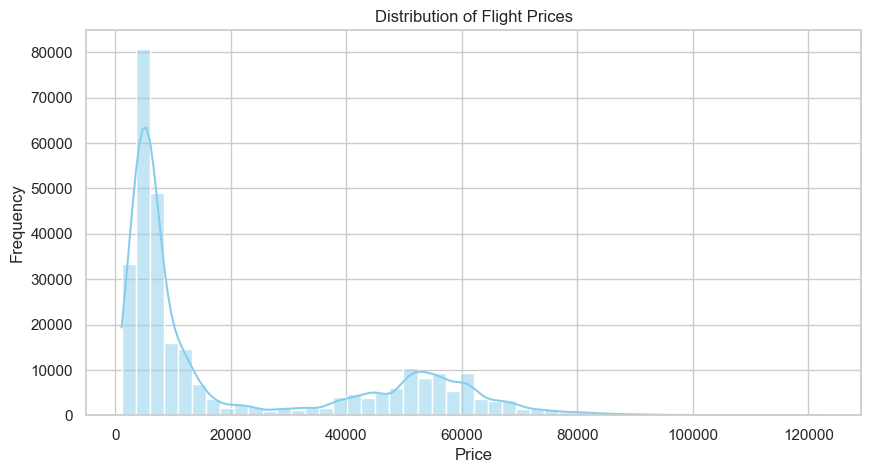

In [5]:
plt.figure(figsize=(10,5))
sns.histplot(df["price"], kde=True, color="skyblue", bins=50)
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

**Insights:**
- The price distribution is right-skewed.
- There are some very high-priced tickets — possible outliers.

## Airline vs Price

Different airlines may charge different rates. Let's explore this.

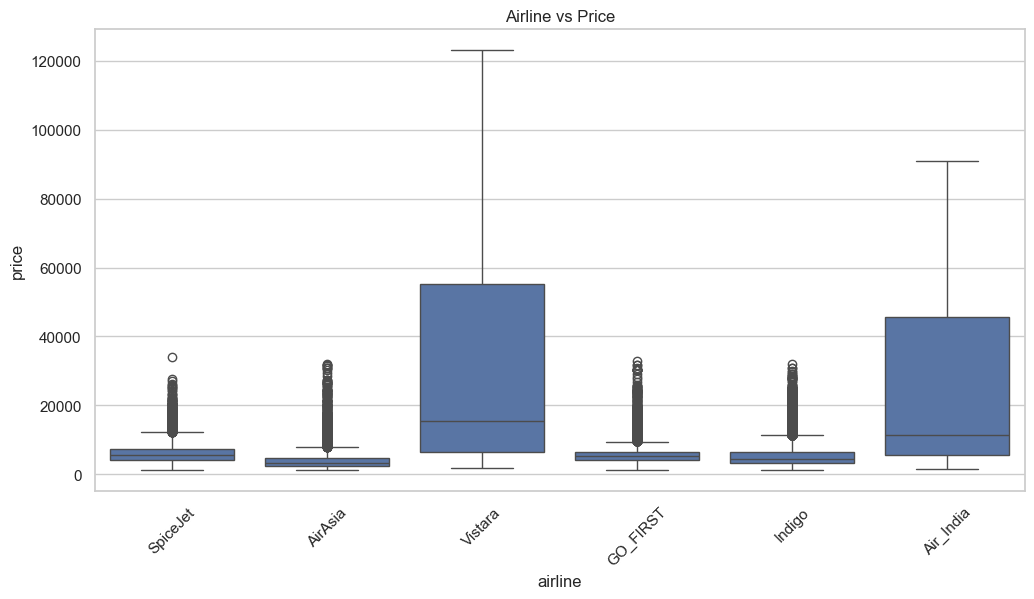

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="airline", y="price")
plt.xticks(rotation=45)
plt.title("Airline vs Price")
plt.show()

**Insights:**
- Vistara tends to have higher median fares.
- Air Asia is more affordable.

## Source and Destination vs Price

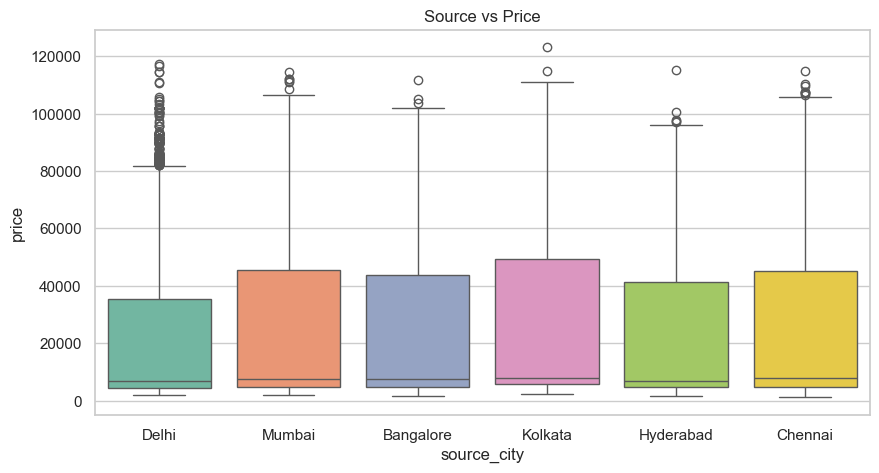

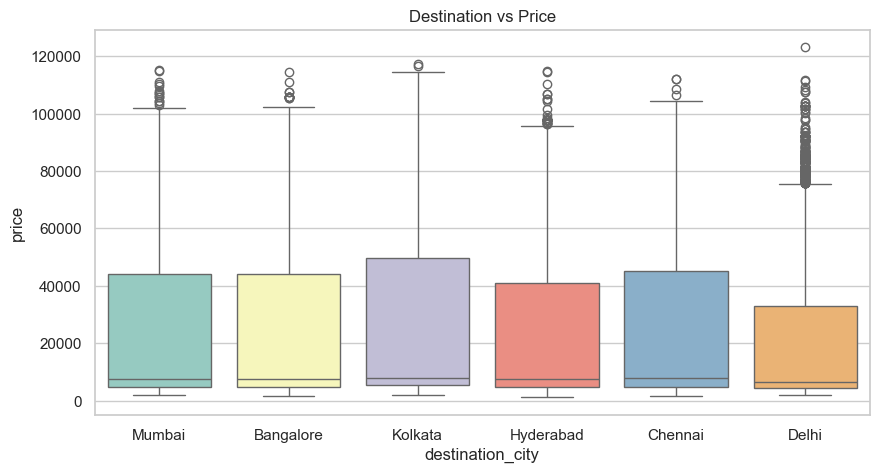

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="source_city", y="price", palette="Set2")
plt.title("Source vs Price")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="destination_city", y="price", palette="Set3")
plt.title("Destination vs Price")
plt.show()

**Insights:**
- Flights from Delhi show more pricing variation.
- Destination doesn't drastically affect price but contributes some variation.

## Duration vs Price

Duration is a numeric feature and likely correlates with price.

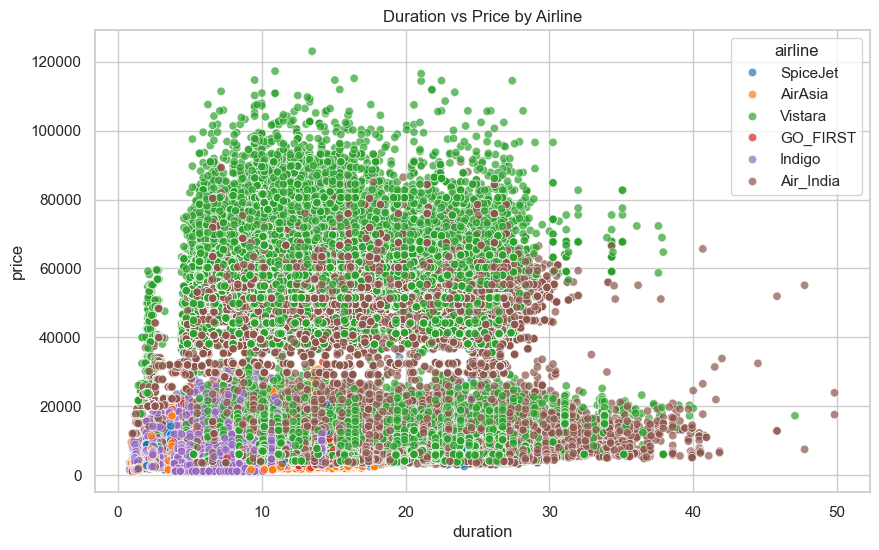

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="duration", y="price", hue="airline", palette="tab10", alpha=0.7)
plt.title("Duration vs Price by Airline")
plt.show()

**Insights:**
- As expected, longer duration flights tend to be more expensive.
- Some short flights have high prices, possibly due to full-service carriers or peak hours.

## Total Stops vs Price

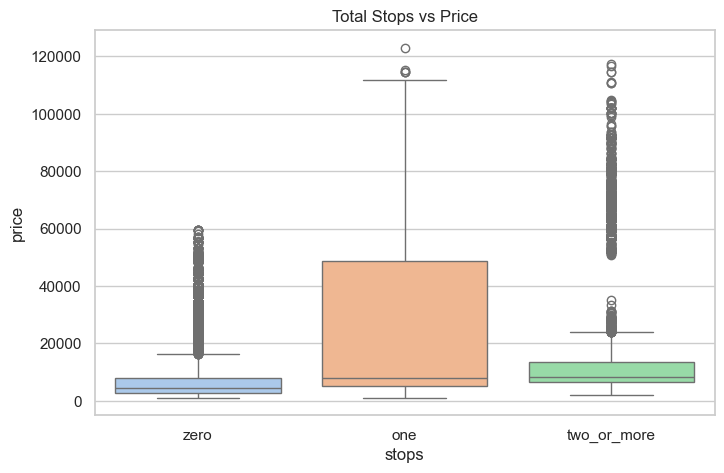

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="stops", y="price", palette="pastel")
plt.title("Total Stops vs Price")
plt.show()

**Insights:**
- Non-stop flights are generally cheaper than 1-stop and 2-stop flights.
- More stops usually increase travel time and cost.

## Correlation Heatmap

Let’s look at correlations among numeric variables.

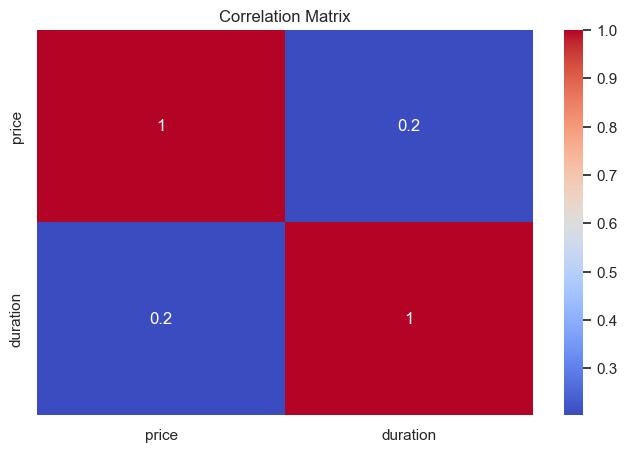

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(df[["price", "duration"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**Insights:**
- Duration has a moderate positive correlation with price (~0.2), as expected.
- Other categorical features will need to be encoded before further correlation analysis.

# Summary of EDA

- **Airline**, **Total Stops**, and **Duration** are strong drivers of price variation.
- There are possible outliers (very high ticket prices), which may require treatment depending on model sensitivity.

This EDA provides a solid foundation for our next steps: preprocessing and model training.